# Plot OTs from the SGP Summer Experiment

## Imports

In [89]:
import xarray as xr
from distributed import LocalCluster, Client
import glob
import hvplot.xarray
import pyart
import matplotlib.pyplot as plt
import numpy as np


## Spin up a Cluster

In [6]:
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64720,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:64744,Total threads: 2
Dashboard: http://127.0.0.1:64745/status,Memory: 6.40 GiB
Nanny: tcp://127.0.0.1:64726,


## Load in the Data

In [49]:
files = sorted(glob.glob("../../data/2018144/*"))
radar_files = sorted(glob.glob("../../data/sgpxsaprcmacsecI5.c1/*"))

Read in the OT algorithm output

In [63]:
ds = xr.open_mfdataset(files)

In [54]:
radar = pyart.io.read(radar_files[5])

/Users/mgrover/miniforge3/envs/tracer-dev/lib/python3.9/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/Users/mgrover/miniforge3/envs/tracer-dev/lib/python3.9/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


Grab the first elevation, and extract gate lats and lons

In [56]:
subset = radar.extract_sweeps([0])

In [57]:
lats, lons, alt = subset.get_gate_lat_lon_alt(0)

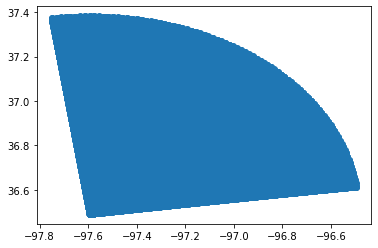

In [112]:
plt.scatter(lons, lats);

## Plot the Intersection of the Two

In [79]:
minlon = -97.8
maxlon = -96.5
minlat = 36.5
maxlat = 37.4

subset_ds = ds.where((ds.latitude >= minlat) &
                     (ds.latitude <= maxlat) &
                     (ds.longitude >= minlon) &
                     (ds.longitude <= maxlon)
                    )

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_20769/2418033548.py:3: RuntimeWarning: All-NaN axis encountered
  if np.isnan(np.nanmax(single_time.ot_id_number)):


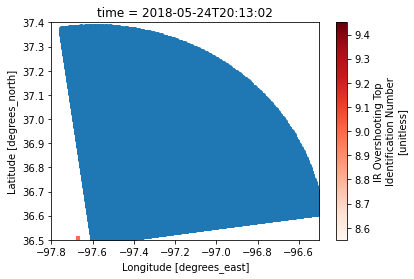

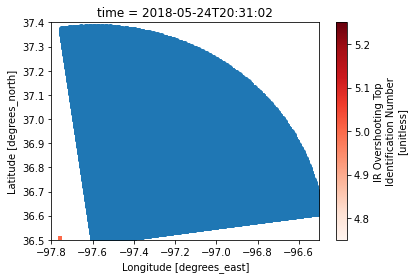

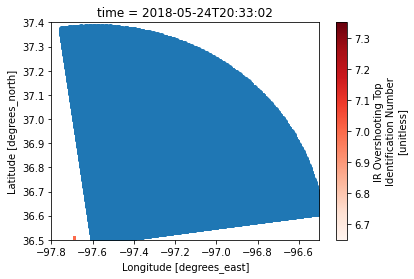

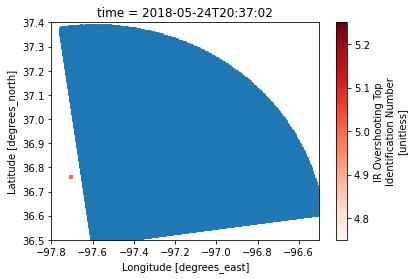

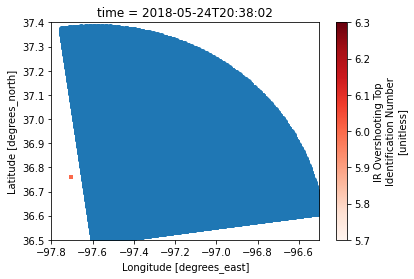

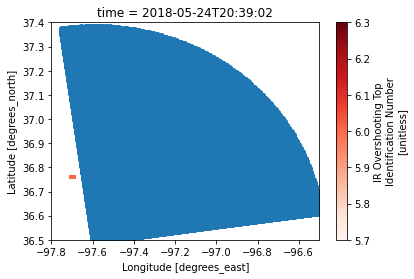

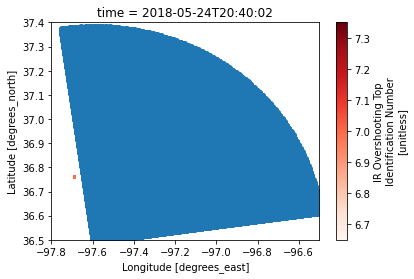

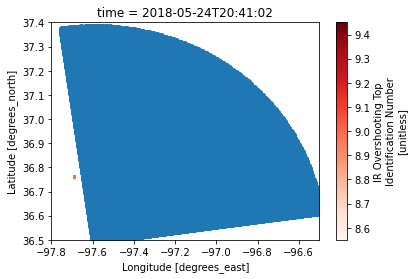

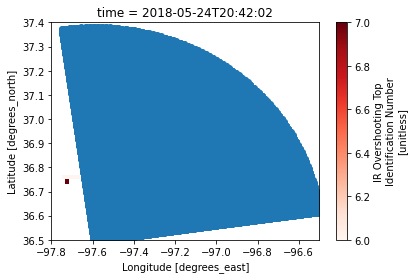

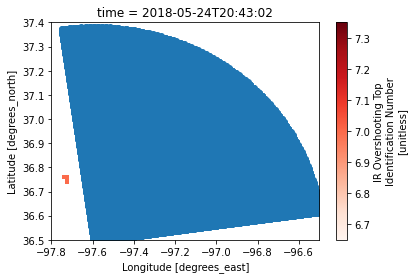

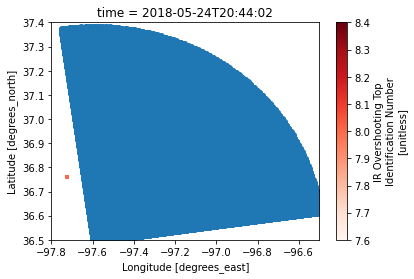

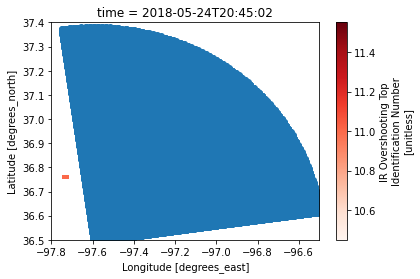

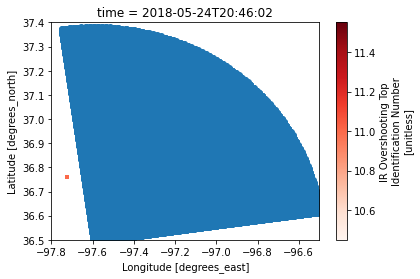

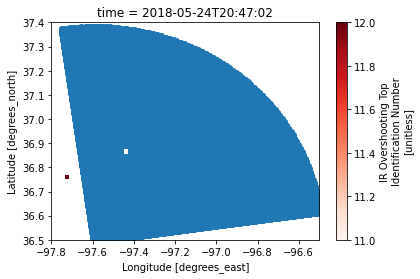

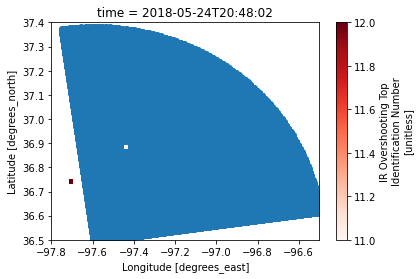

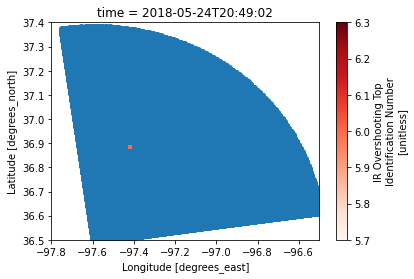

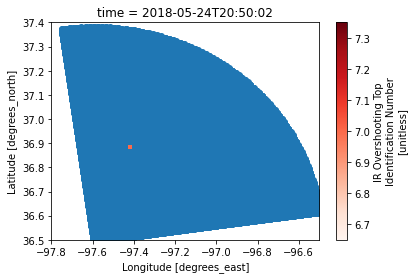

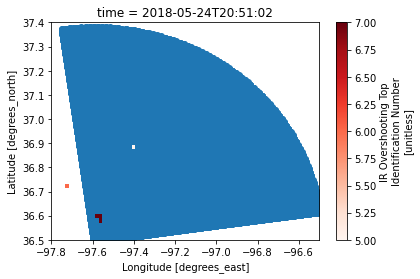

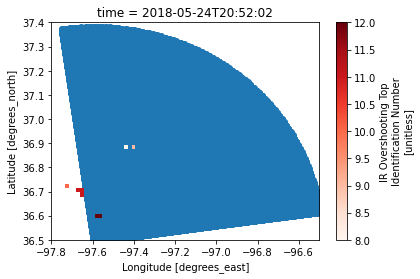

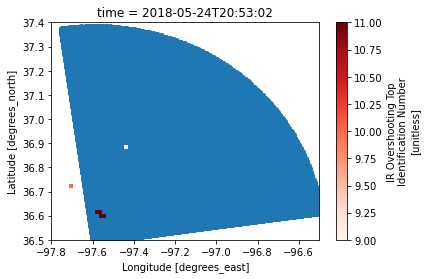

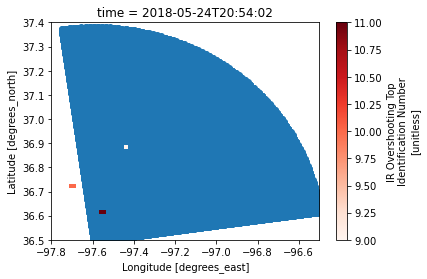

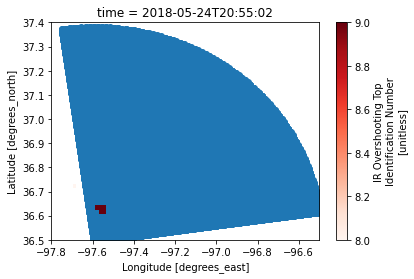

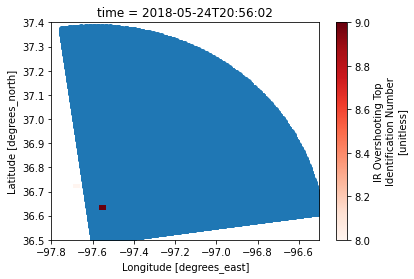

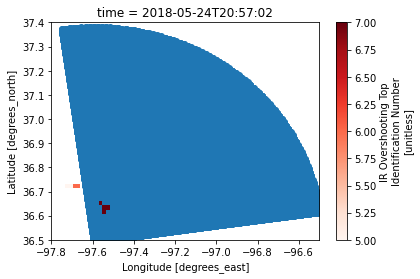

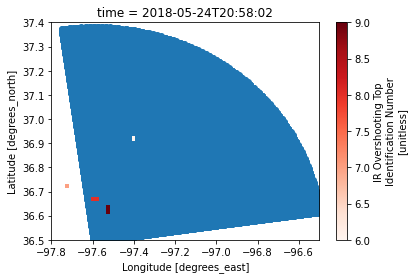

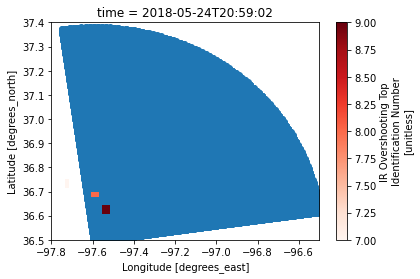

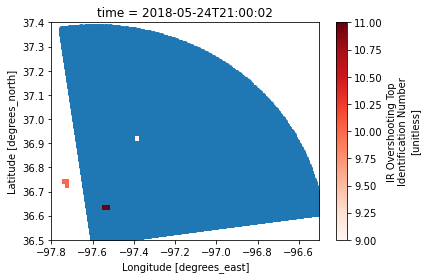

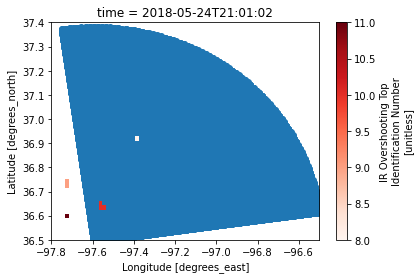

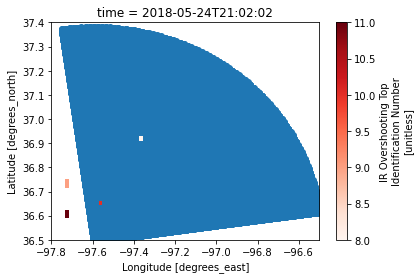

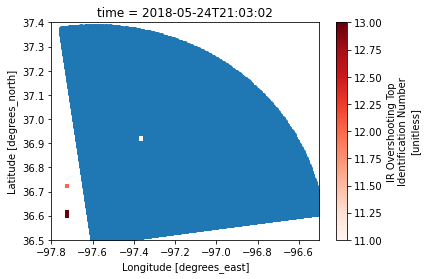

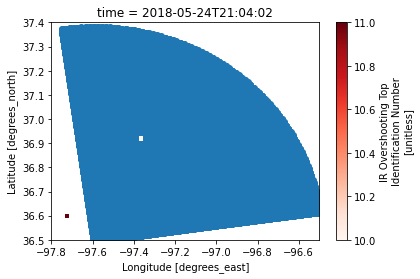

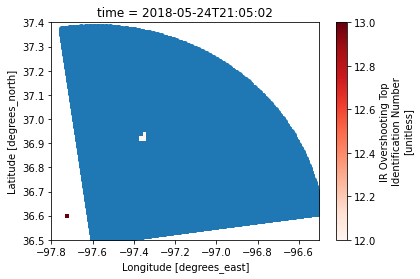

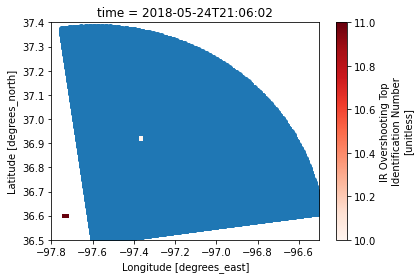

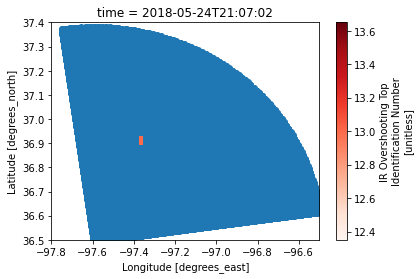

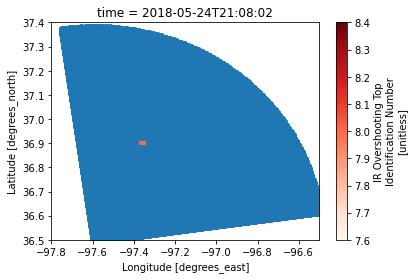

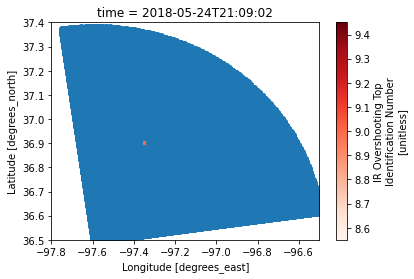

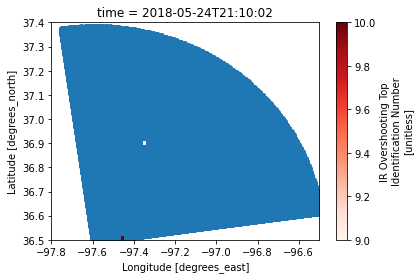

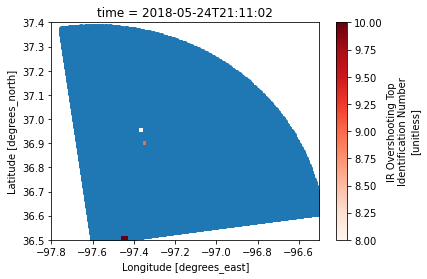

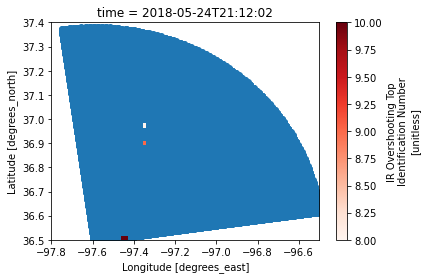

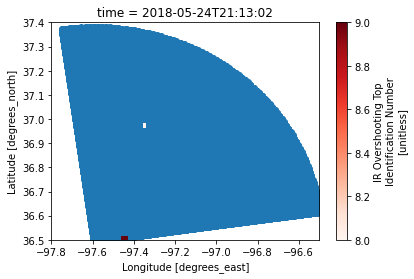

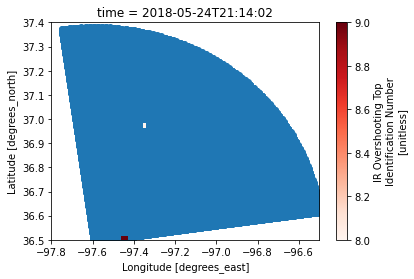

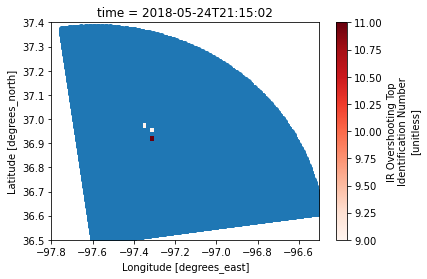

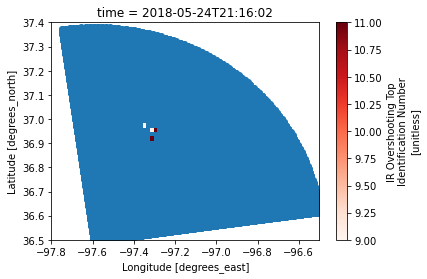

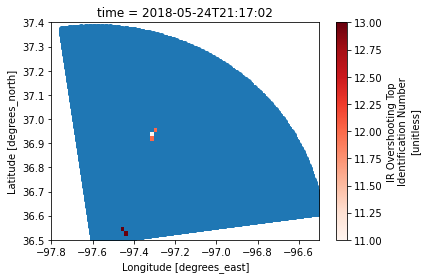

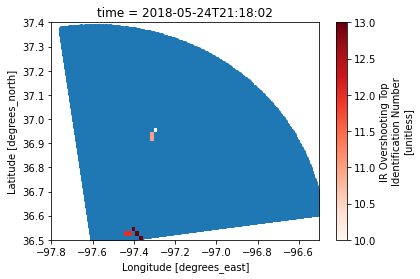

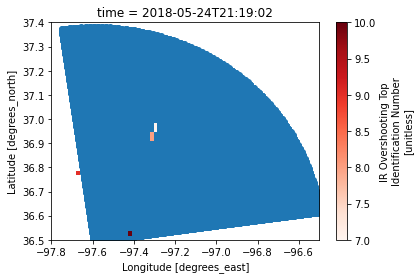

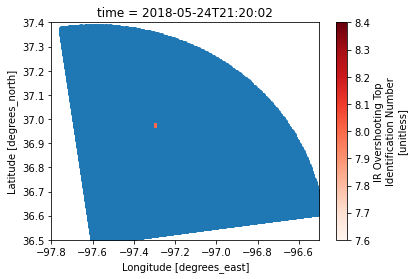

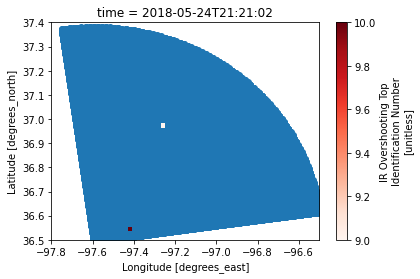

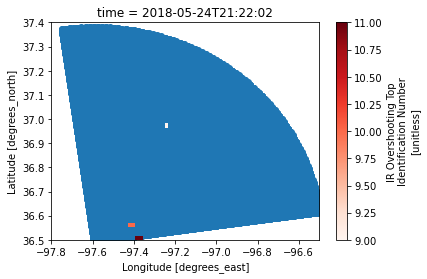

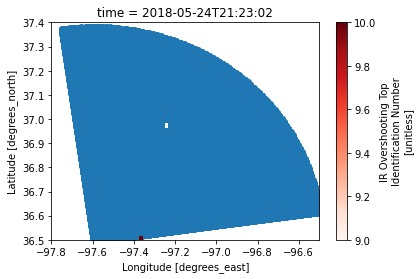

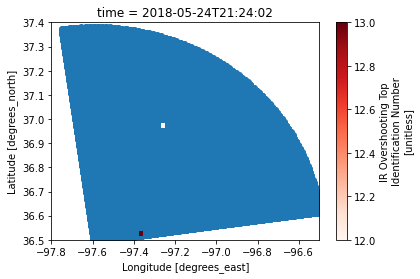

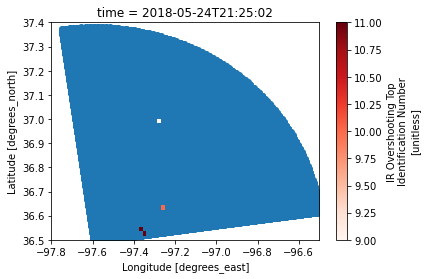

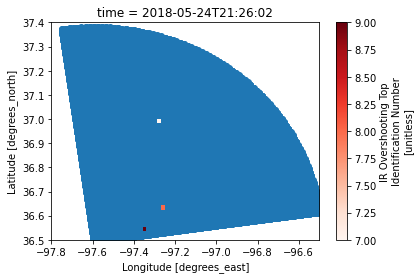

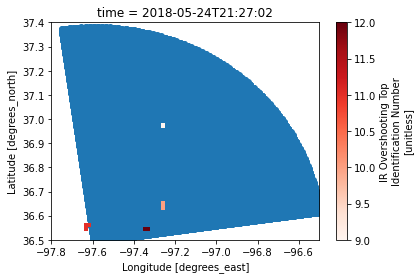

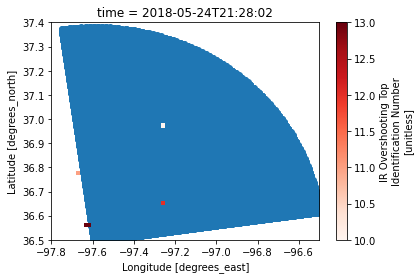

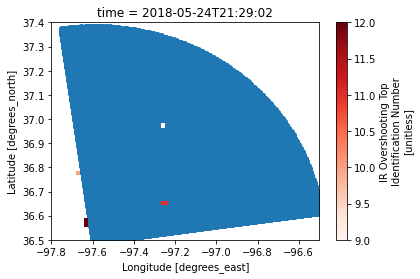

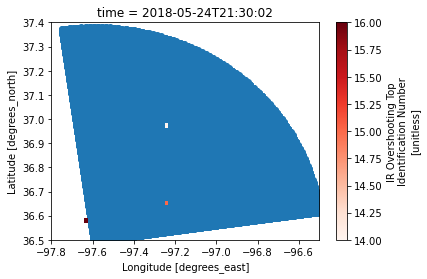

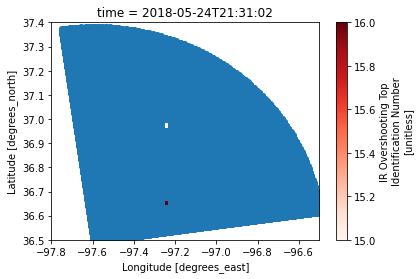

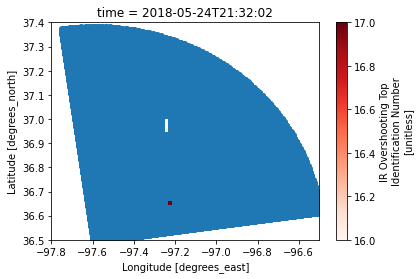

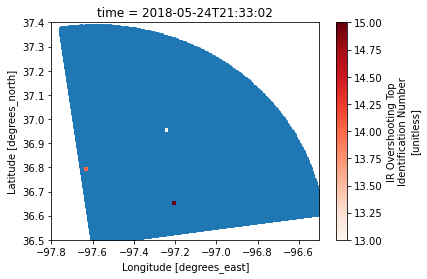

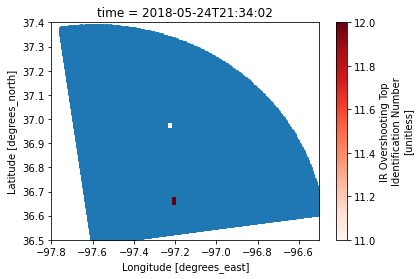

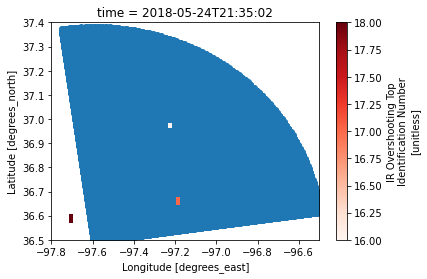

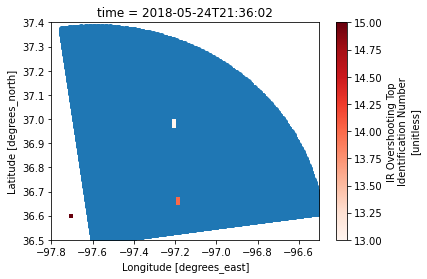

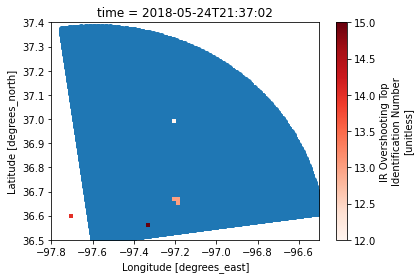

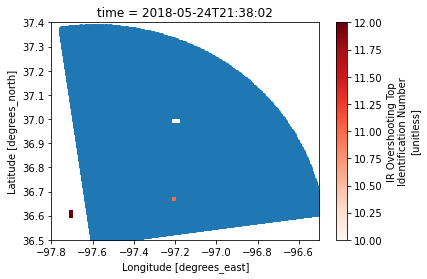

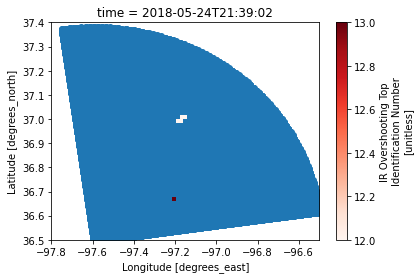

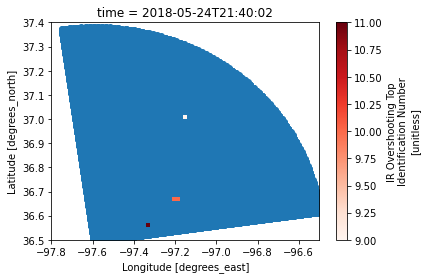

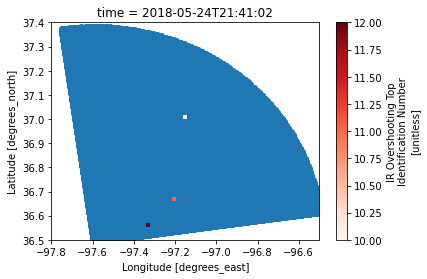

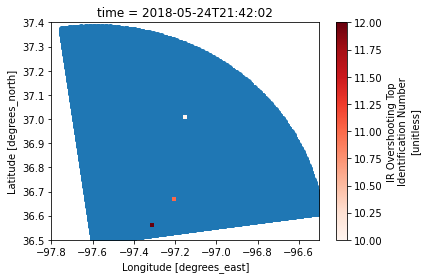

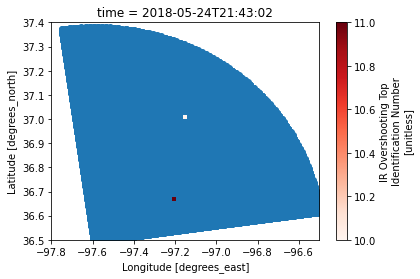

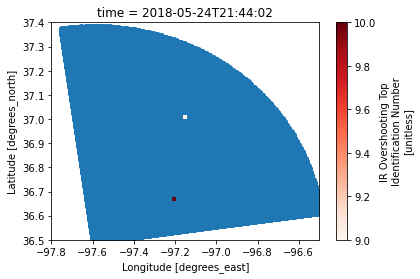

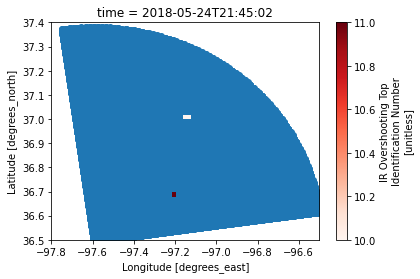

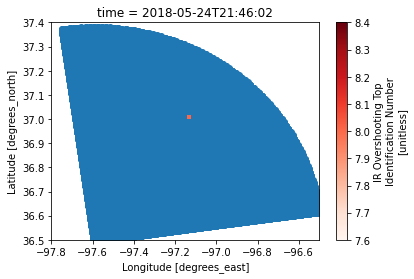

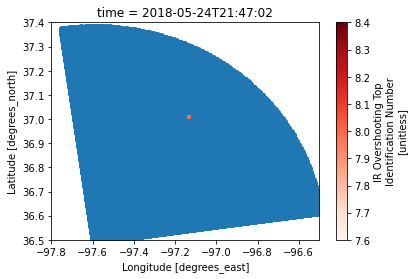

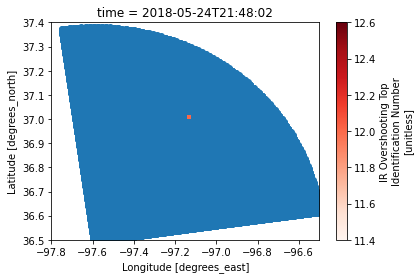

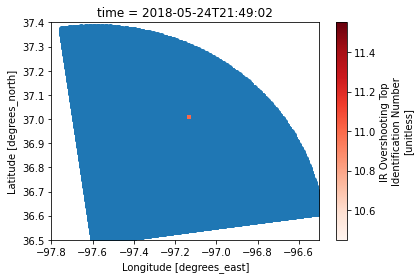

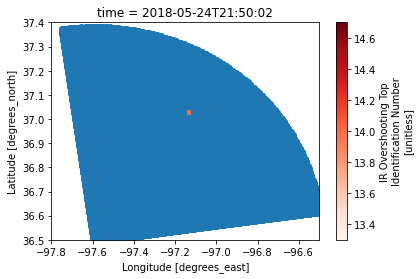

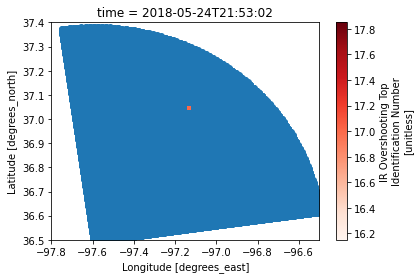

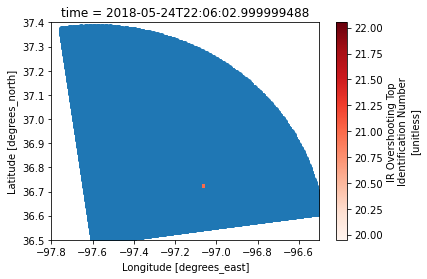

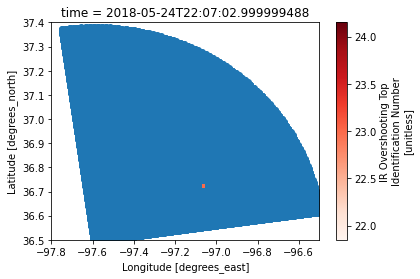

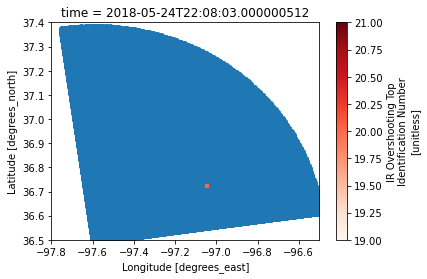

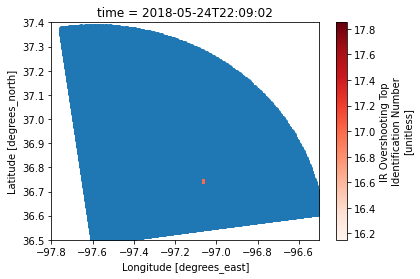

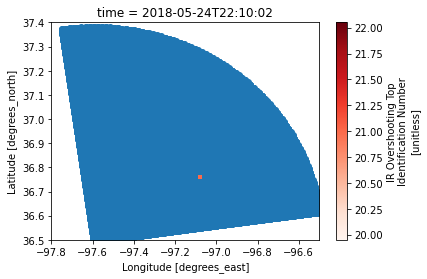

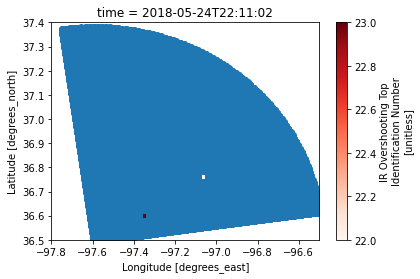

Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x1233c7df0>>
Traceback (most recent call last):
  File "/Users/mgrover/miniforge3/envs/tracer-dev/lib/python3.9/site-packages/distributed/utils_perf.py", line 189, in _gc_callback
    self._fractional_timer.start_timing()
  File "/Users/mgrover/miniforge3/envs/tracer-dev/lib/python3.9/site-packages/distributed/utils_perf.py", line 116, in start_timing
    assert self._cur_start is None
AssertionError: 


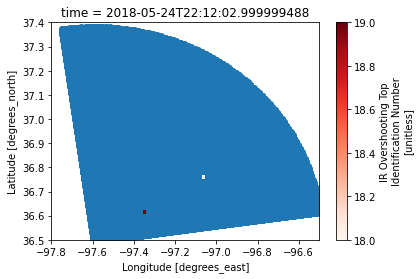

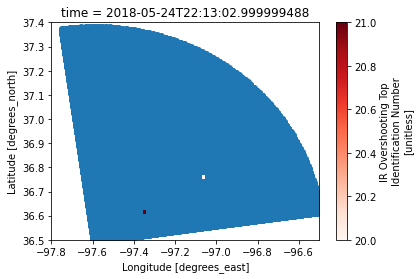

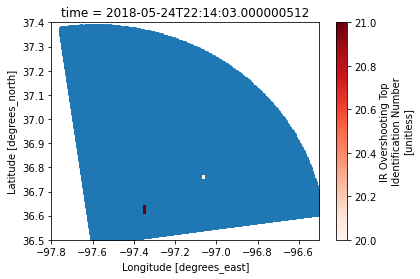

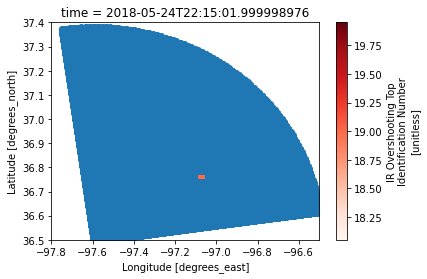

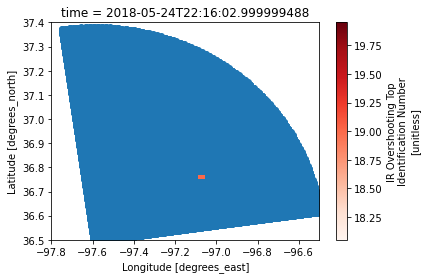

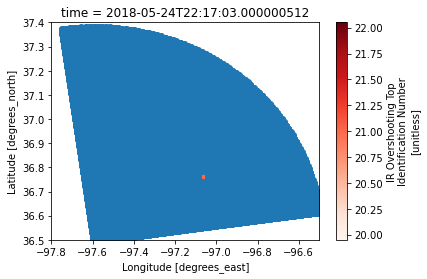

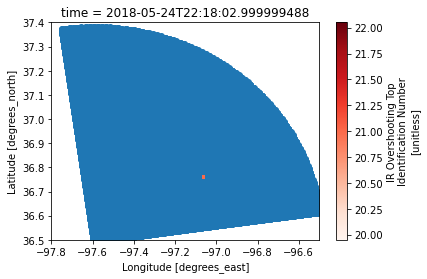

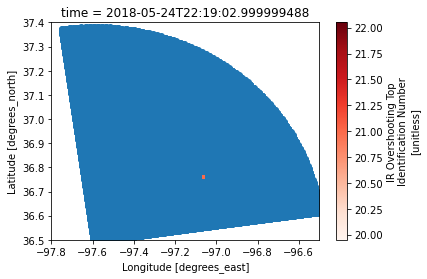

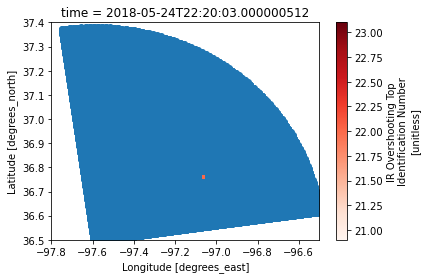

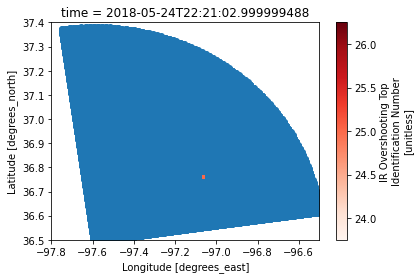

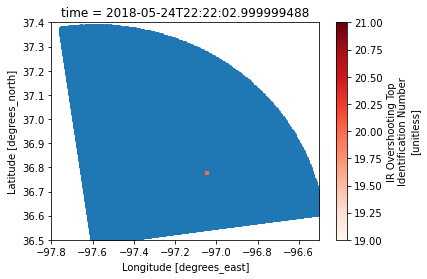

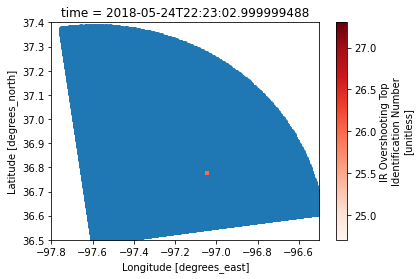

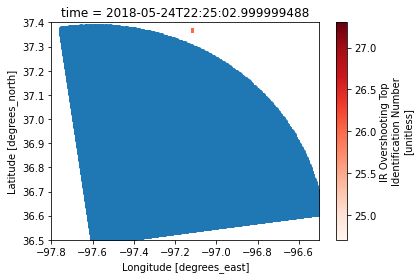

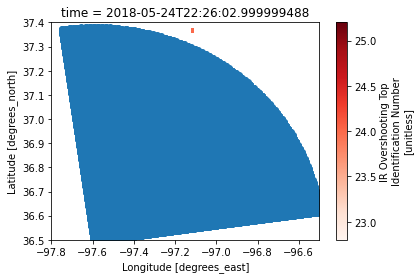

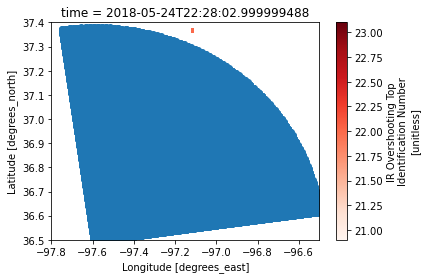

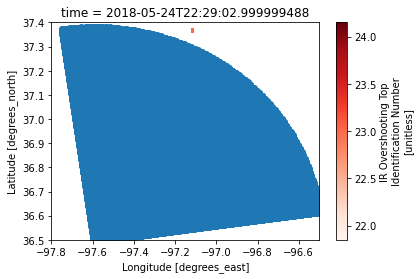

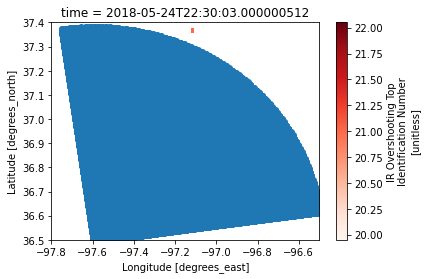

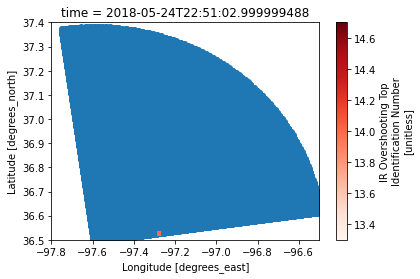

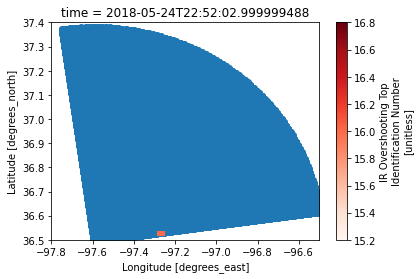

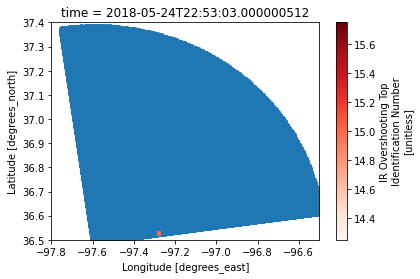

In [110]:
for time in ds.time:
    single_time = subset_ds.sel(time=time)
    if np.isnan(np.nanmax(single_time.ot_id_number)):
        continue
    plt.scatter(lons, lats)
    single_time.ot_id_number.plot(x='longitude',
                                  y='latitude',
                                  cmap='Reds')
    plt.xlim(minlon, maxlon)
    plt.ylim(minlat, maxlat)
    plt.show()
    plt.close()